# 1) Installing Dependencies

- Refer: https://stackoverflow.com/questions/73142498/installing-fbprophet-on-colab

In [ ]:
!pip install bdist-wheel-name

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 36.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826247 sha256=9fb2498c1d240e77f99155b140e46f2788bce3bb3fad92d8c8a67a1098b8472d
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.7.0
    Uninstalling pystan-3.7.0:
      Successfully uninstalled pystan-3.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436628 sha256=b1737dc7401a4197d8f304c6c7c657c09065aa325f5ee35c2

In [ ]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
bdist-wheel-name              0.1.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca

# 2) Mounting Google Drive

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3) Importing Requisite Libraries

In [ ]:
from fbprophet import Prophet as prophet
import pandas as pd

# 4) Loading The Dataset

In [ ]:
T_df = pd.read_csv("/content/drive/MyDrive/ML DL Content/Facebook Prophet/data/TeslaCarSales.csv")
T_df.head()

,Date,Store/Product,Value
0,20180101,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,20180102,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,20180103,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,20180104,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,20180105,LOS_ANGELES-TESLA_MODEL_X,2660.000


### Observation:
- The imported dataset has 3 columns namely : Date,Product and Value
- Date indicates when the sale was made for which product at what value


# 5) Data Analysis

In [ ]:
T_df.shape

(3240, 3)

In [ ]:
T_df.dtypes

Date               int64
Store/Product     object
Value            float64
dtype: object

Observation:
- There are a total of 3240 datapoints in the given dataset.
- The column `Date` is not in the right format as its datatype is integer so it needs to be typecasted to the right datatype.
- `Store/Product` is a categorical variable and `Value` is a numeric variable
- The remaining 2 columns are correct in terms of their datatype.

In [ ]:
# Typecasting the Date column 
T_df['Date'] = pd.to_datetime(T_df['Date'],format="%Y%m%d")
T_df.head()

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [ ]:
T_df.dtypes

Date             datetime64[ns]
Store/Product            object
Value                   float64
dtype: object

Observation: Date column is now in correct format

In [ ]:
# Counting the unique values in the categorical variable
T_df['Store/Product'].value_counts()

LOS_ANGELES-TESLA_MODEL_X      1080
LOS_ANGELES-TESLA_MODEL_S      1080
SAN_FRANCISCO-TESLA_MODEL_S    1080
Name: Store/Product, dtype: int64

In [ ]:
# Checking for null values
T_df.isna().sum()

Date             0
Store/Product    0
Value            0
dtype: int64

In [ ]:
x = T_df.duplicated()
print(x.value_counts(),type(x),sep='\n')

False    3240
dtype: int64
<class 'pandas.core.series.Series'>


Observations:
- Performing a value counts on the categorical variable `Store/Product` gives a segregation of 3 values as: <br>
LOS_ANGELES-TESLA_MODEL_X <br>     
LOS_ANGELES-TESLA_MODEL_S  <br>    
SAN_FRANCISCO-TESLA_MODEL_S <br>  
and each of them have 1080 datapoints
- When checking for null and duplicate values, we find that there are none
<br><br><br>
### <b>Conclusion: The given dataset is a highly curated dataset </b>

# 6) Data Preprocessing as per FBProphets requirements

In [ ]:
# Since FBProphet can work on univariate time series we need to segregate our classes based upon the Product
LA_TMX = T_df[T_df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_X'].copy()
LA_TMS = T_df[T_df['Store/Product'] == 'LOS_ANGELES-TESLA_MODEL_S'].copy()
SF_TMS = T_df[T_df['Store/Product'] == 'SAN_FRANCISCO-TESLA_MODEL_S'].copy()

In [ ]:
# Checking the head values of the segregated dataframes
LA_TMX.head()

,Date,Store/Product,Value
0,2018-01-01,LOS_ANGELES-TESLA_MODEL_X,2926.000
1,2018-01-02,LOS_ANGELES-TESLA_MODEL_X,2687.531
2,2018-01-03,LOS_ANGELES-TESLA_MODEL_X,2793.000
3,2018-01-04,LOS_ANGELES-TESLA_MODEL_X,2394.000
4,2018-01-05,LOS_ANGELES-TESLA_MODEL_X,2660.000


In [ ]:
LA_TMS.head()

,Date,Store/Product,Value
1080,2018-01-01,LOS_ANGELES-TESLA_MODEL_S,3239.6000
1081,2018-01-02,LOS_ANGELES-TESLA_MODEL_S,2983.2841
1082,2018-01-03,LOS_ANGELES-TESLA_MODEL_S,3097.3000
1083,2018-01-04,LOS_ANGELES-TESLA_MODEL_S,2660.4000
1084,2018-01-05,LOS_ANGELES-TESLA_MODEL_S,2953.0000


In [ ]:
SF_TMS.head()

,Date,Store/Product,Value
2160,2018-01-01,SAN_FRANCISCO-TESLA_MODEL_S,2679.4000
2161,2018-01-02,SAN_FRANCISCO-TESLA_MODEL_S,2466.7779
2162,2018-01-03,SAN_FRANCISCO-TESLA_MODEL_S,2562.7000
2163,2018-01-04,SAN_FRANCISCO-TESLA_MODEL_S,2203.6000
2164,2018-01-05,SAN_FRANCISCO-TESLA_MODEL_S,2441.0000


In [ ]:
# Checking the value counts for each product
print("LA_TMX:",LA_TMX.value_counts('Store/Product'),
      "\n\nLA_TMS:",LA_TMS.value_counts('Store/Product'),
      "\n\nSF_TMS:",SF_TMS.value_counts('Store/Product'))

LA_TMX: Store/Product
LOS_ANGELES-TESLA_MODEL_X    1080
dtype: int64 

LA_TMS: Store/Product
LOS_ANGELES-TESLA_MODEL_S    1080
dtype: int64 

SF_TMS: Store/Product
SAN_FRANCISCO-TESLA_MODEL_S    1080
dtype: int64


Observation: 
- From the above code cells we can confirm that the split of our data based on products has occured properly and the value counts before and post segregation match

Task:
- FBProphet only takes two columns and that too in a particular named format.
- The date column has to be given the name `ds` and the format of date should be `YYYY-MM-DD` and the `value to be forecasted` must given under the column name of `y`.(YYYY-MM-DD HH:MM:SS for a timestamp)
- So we have to drop the `Store/Product` column from each of the segregated dataframes.

In [ ]:
# Dropping the Store/Product column
LA_TMX.drop('Store/Product', axis=1, inplace=True)
LA_TMS.drop('Store/Product', axis=1, inplace=True)
SF_TMS.drop('Store/Product', axis=1, inplace=True)

In [ ]:
# Renaming the columns
LA_TMX.columns = ['ds', 'y']
LA_TMS.columns = ['ds', 'y']
SF_TMS.columns = ['ds', 'y']

In [ ]:
LA_TMX.head()

,ds,y
0,2018-01-01,2926.000
1,2018-01-02,2687.531
2,2018-01-03,2793.000
3,2018-01-04,2394.000
4,2018-01-05,2660.000


In [ ]:
LA_TMS.head()

,ds,y
1080,2018-01-01,3239.6000
1081,2018-01-02,2983.2841
1082,2018-01-03,3097.3000
1083,2018-01-04,2660.4000
1084,2018-01-05,2953.0000


In [ ]:
SF_TMS.head()

,ds,y
2160,2018-01-01,2679.4000
2161,2018-01-02,2466.7779
2162,2018-01-03,2562.7000
2163,2018-01-04,2203.6000
2164,2018-01-05,2441.0000


Result: The segregated dataframes have made according to the requirements of the FBProphet

# 7) Creating Time Series Model

In [ ]:
# Creating instance of prophet class for each model and store
LA_TMX_model = prophet(interval_width=0.95, daily_seasonality=True) 
LA_TMS_model = prophet(interval_width=0.95, daily_seasonality=True) 
SF_TMS_model = prophet(interval_width=0.95, daily_seasonality=True) 

- 95% confidence interval -> determines the width of uncertainity interval in terms of percentage that is used to estimate the forecast
- daily_seasonality -> kept True in order to enable seasonality fitting => means that forecast will consider that sales will also get imapcted with seasons. 

In [ ]:
# Fitting the model for each Store/Product
training_LA_TMX = LA_TMX_model.fit(LA_TMX)
training_LA_TMS = LA_TMS_model.fit(LA_TMS)
training_SF_TMS = SF_TMS_model.fit(SF_TMS)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# 8) Forecasting

## 8.1) Forecasting - LOS_ANGELES-TESLA_MODEL_X

In [ ]:
# periods tell how much far in future you want to predict and frequency tells how oftem do you want to predict, "D" means daily.
future_LA_TMX = LA_TMX_model.make_future_dataframe(periods=400, freq='D')

In [ ]:
forecast = LA_TMX_model.predict(future_LA_TMX)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.462653,905.256003,3967.524378,3040.462653,3040.462653,-645.839364,-645.839364,-645.839364,463.68979,...,16.643716,16.643716,16.643716,-1126.172870,-1126.172870,-1126.172870,0.0,0.0,0.0,2394.623289
1,2018-01-02,3041.255696,824.564464,3935.433479,3041.255696,3041.255696,-655.816581,-655.816581,-655.816581,463.68979,...,-11.263085,-11.263085,-11.263085,-1108.243287,-1108.243287,-1108.243287,0.0,0.0,0.0,2385.439115
2,2018-01-03,3042.048740,728.002784,3955.833247,3042.048740,3042.048740,-629.836306,-629.836306,-629.836306,463.68979,...,-4.394888,-4.394888,-4.394888,-1089.131208,-1089.131208,-1089.131208,0.0,0.0,0.0,2412.212434
3,2018-01-04,3042.841783,813.185480,4098.006944,3042.841783,3042.841783,-582.757660,-582.757660,-582.757660,463.68979,...,22.467514,22.467514,22.467514,-1068.914964,-1068.914964,-1068.914964,0.0,0.0,0.0,2460.084123
4,2018-01-05,3043.634827,913.981653,3928.146715,3043.634827,3043.634827,-618.630432,-618.630432,-618.630432,463.68979,...,-34.594707,-34.594707,-34.594707,-1047.725516,-1047.725516,-1047.725516,0.0,0.0,0.0,2425.004394


Observation:
- yhat represents the forecast made by the model, and on initially comparing it with the original values the difference may seem large but by plotting we can get a better visulaization of the difference.
- yhat_upper and yhat_lower represent the bounds within which the forecast can vary.

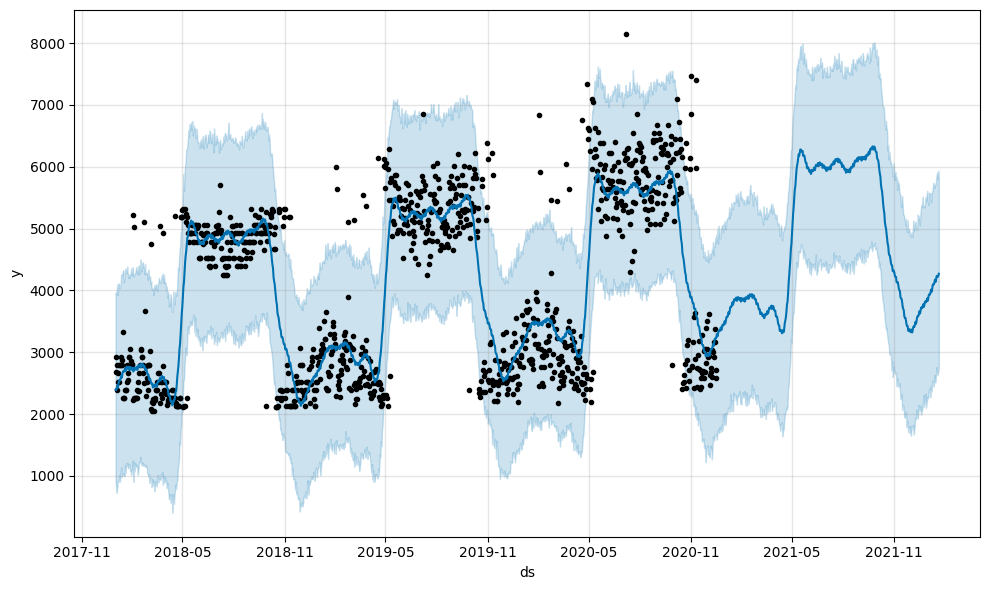

In [ ]:
plot1 = LA_TMX_model.plot(forecast)

Observation:
- The dark blue line is yhat predicted by the model.
- Black dots represent our training data points.
- The shaded blue region is the 95% interval width bound by the yhat_upper and yhat_lower.


### LA_TMX with 65% interval width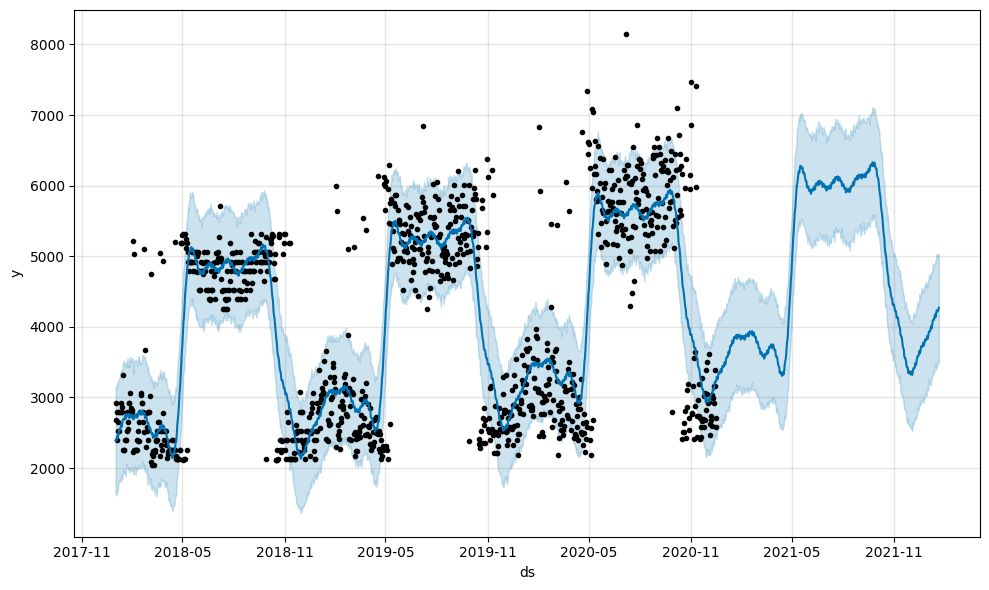

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


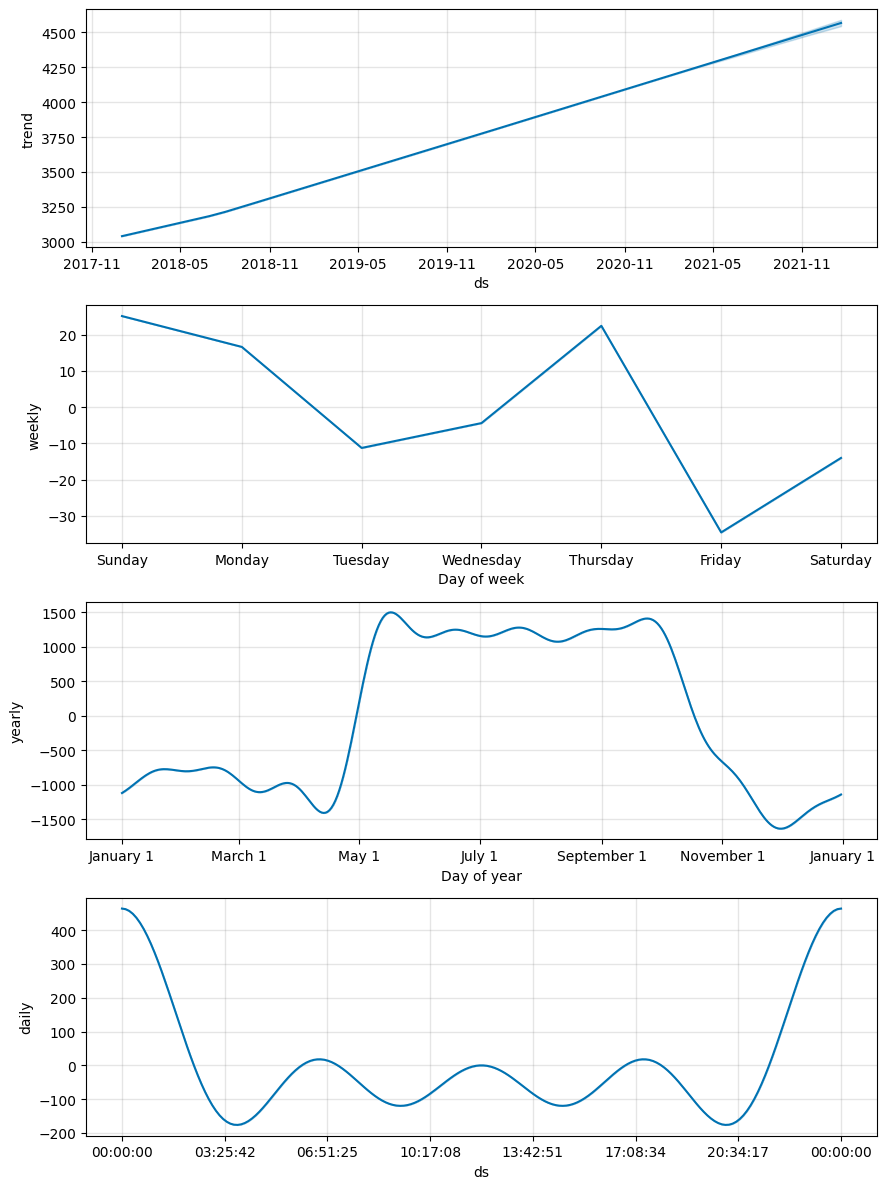

In [ ]:
plot2 = LA_TMX_model.plot_components(forecast)

## 8.2) Forecasting - LOS_ANGELES-TESLA_MODEL_S

In [ ]:
future_LA_TMS = LA_TMS_model.make_future_dataframe(periods=400, freq='D') 

In [ ]:
forecast = LA_TMS_model.predict(future_LA_TMS)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3366.599749,767.345709,4355.516996,3366.599749,3366.599749,-706.161886,-706.161886,-706.161886,514.417432,...,18.355639,18.355639,18.355639,-1238.934957,-1238.934957,-1238.934957,0.0,0.0,0.0,2660.437863
1,2018-01-02,3367.455346,927.814045,4444.601377,3367.455346,3367.455346,-717.124383,-717.124383,-717.124383,514.417432,...,-12.190606,-12.190606,-12.190606,-1219.351209,-1219.351209,-1219.351209,0.0,0.0,0.0,2650.330963
2,2018-01-03,3368.310943,837.875162,4419.180838,3368.310943,3368.310943,-688.738902,-688.738902,-688.738902,514.417432,...,-4.691034,-4.691034,-4.691034,-1198.465300,-1198.465300,-1198.465300,0.0,0.0,0.0,2679.572041
3,2018-01-04,3369.166540,950.395270,4541.160890,3369.166540,3369.166540,-637.321575,-637.321575,-637.321575,514.417432,...,24.622995,24.622995,24.622995,-1176.362002,-1176.362002,-1176.362002,0.0,0.0,0.0,2731.844965
4,2018-01-05,3370.022137,881.921300,4453.128113,3370.022137,3370.022137,-677.124478,-677.124478,-677.124478,514.417432,...,-38.357834,-38.357834,-38.357834,-1153.184076,-1153.184076,-1153.184076,0.0,0.0,0.0,2692.897659


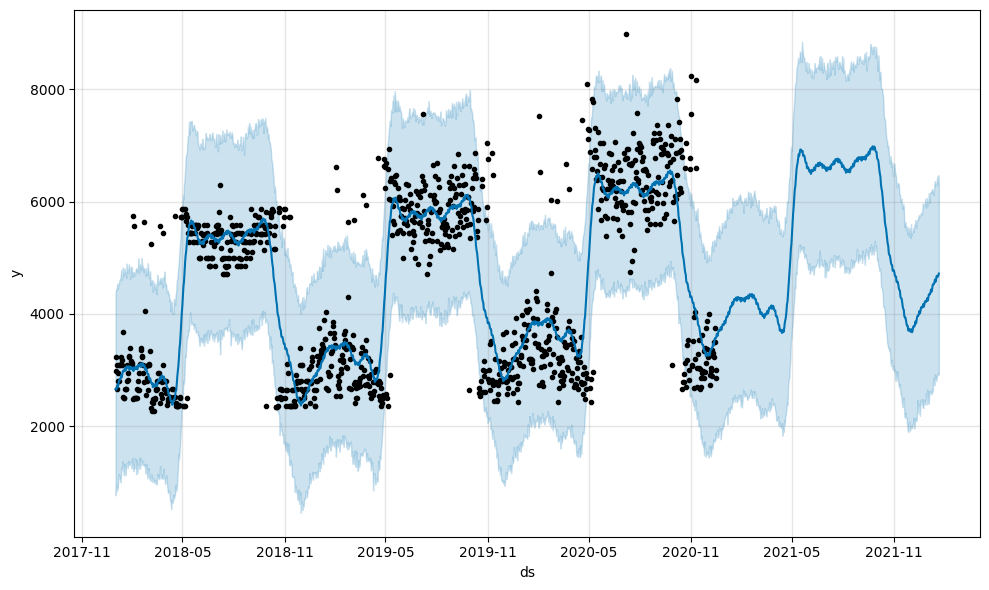

In [ ]:
plot1 = LA_TMS_model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


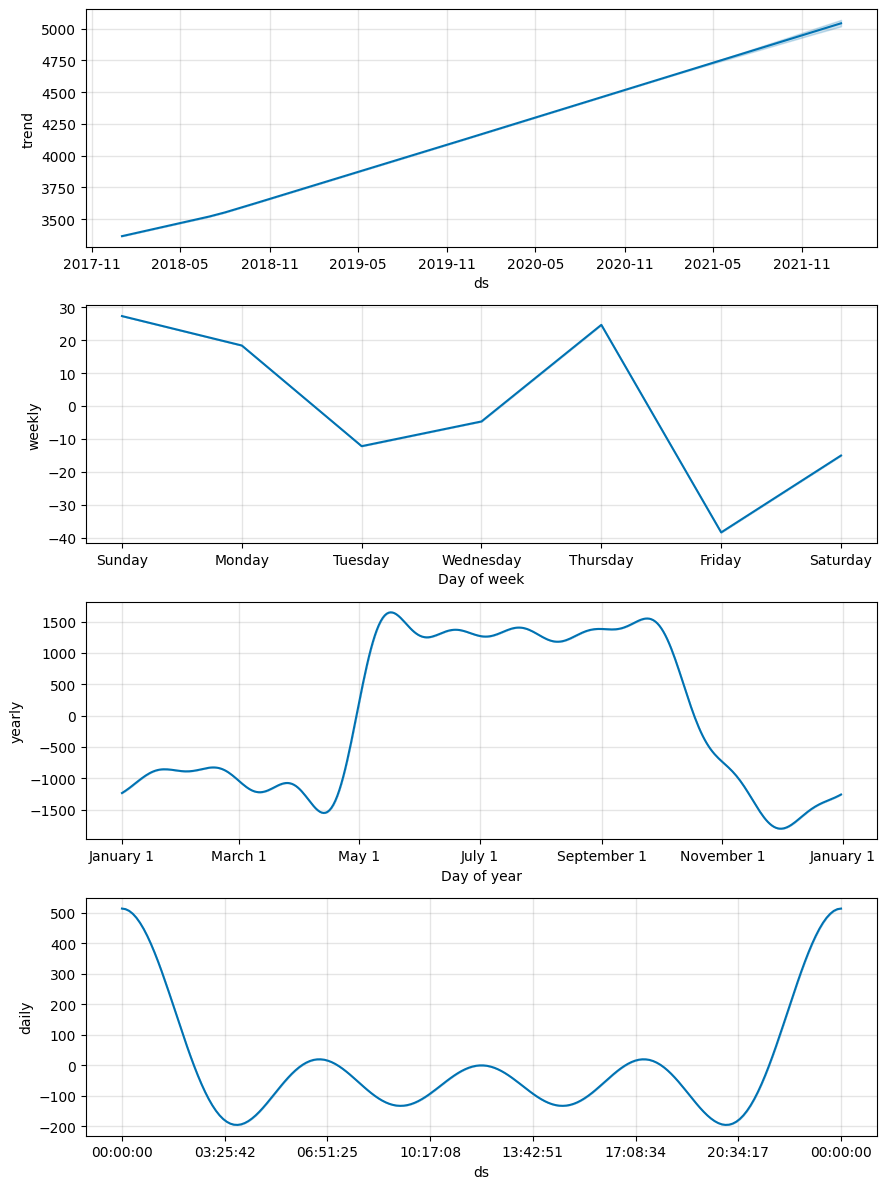

In [ ]:
plot2 = LA_TMS_model.plot_components(forecast)

## 8.3) Forecasting - SAN_FRANSISCO-TESLA_MODEL_S

In [ ]:
future_SF_TMS = SF_TMS_model.make_future_dataframe(periods=400, freq='D') 

In [ ]:
forecast = SF_TMS_model.predict(future_LA_TMX)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,2784.309881,819.606848,3623.496622,2784.309881,2784.309881,-574.047659,-574.047659,-574.047659,424.829593,...,14.809868,14.809868,14.809868,-1013.687120,-1013.687120,-1013.687120,0.0,0.0,0.0,2210.262222
1,2018-01-02,2784.975556,743.987822,3604.395363,2784.975556,2784.975556,-583.156699,-583.156699,-583.156699,424.829593,...,-10.219960,-10.219960,-10.219960,-997.766332,-997.766332,-997.766332,0.0,0.0,0.0,2201.818856
2,2018-01-03,2785.641230,819.161399,3626.582006,2785.641230,2785.641230,-559.955714,-559.955714,-559.955714,424.829593,...,-4.004296,-4.004296,-4.004296,-980.781011,-980.781011,-980.781011,0.0,0.0,0.0,2225.685516
3,2018-01-04,2786.306905,818.291595,3621.484996,2786.306905,2786.306905,-517.650236,-517.650236,-517.650236,424.829593,...,20.319255,20.319255,20.319255,-962.799084,-962.799084,-962.799084,0.0,0.0,0.0,2268.656669
4,2018-01-05,2786.972579,766.211127,3708.238418,2786.972579,2786.972579,-550.246672,-550.246672,-550.246672,424.829593,...,-31.140334,-31.140334,-31.140334,-943.935931,-943.935931,-943.935931,0.0,0.0,0.0,2236.725908


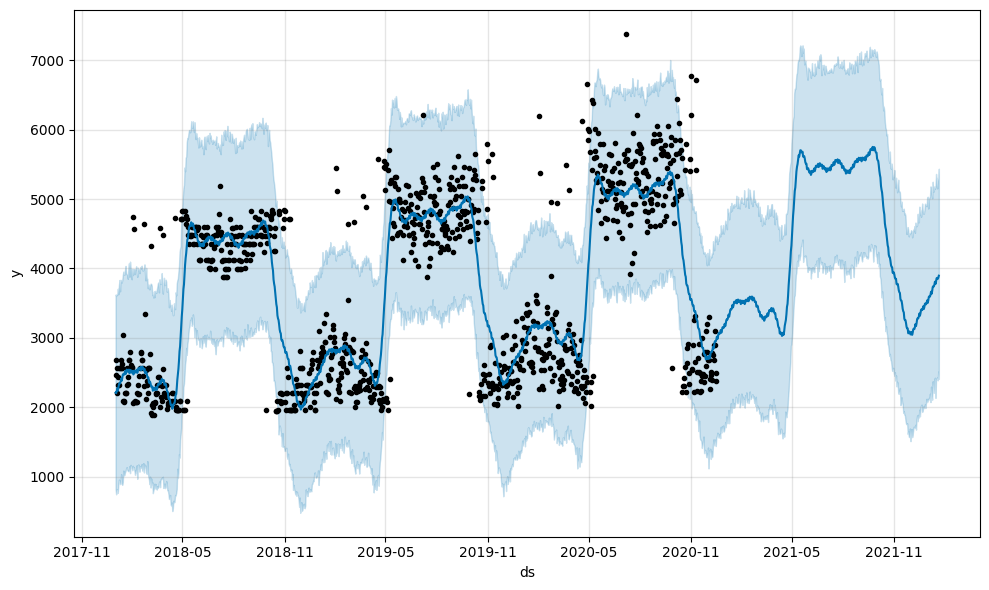

In [ ]:
plot1 = SF_TMS_model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


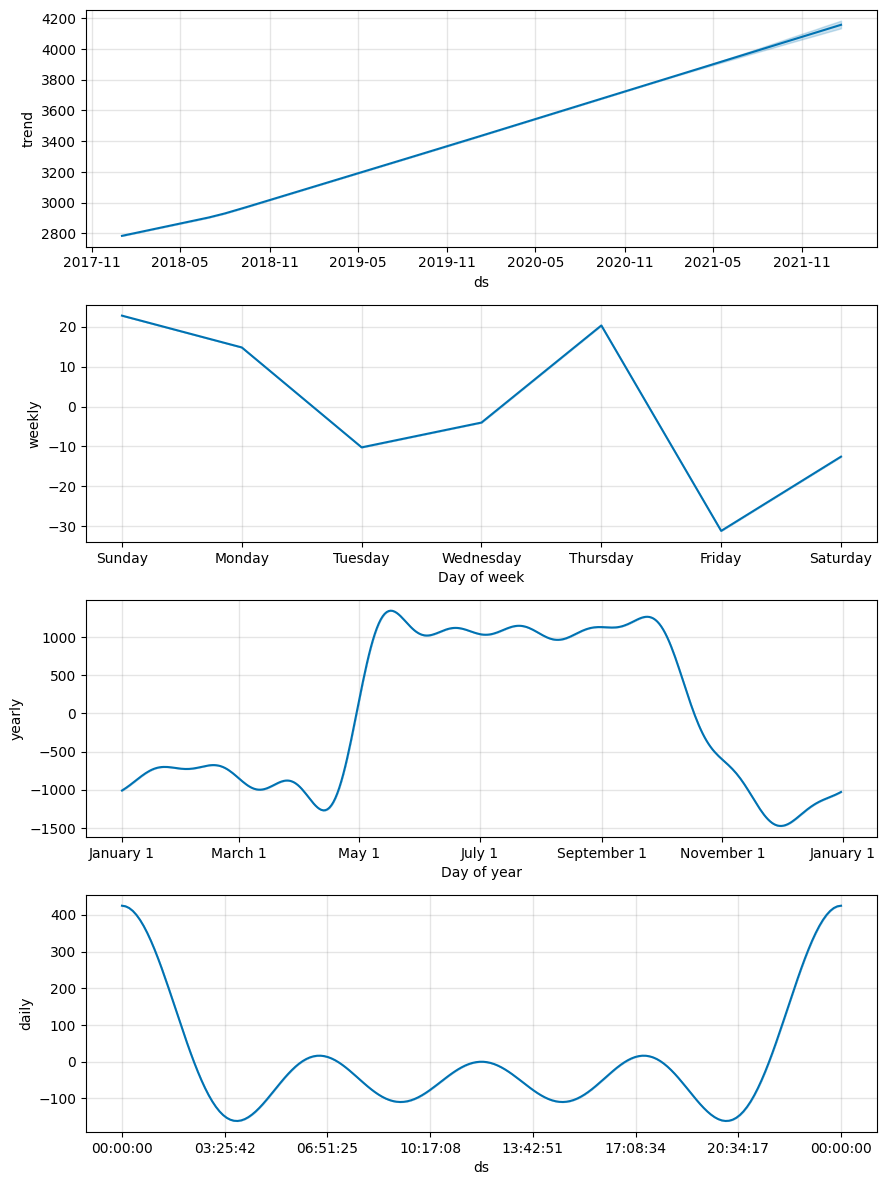

In [ ]:
plot2 = SF_TMS_model.plot_components(forecast)